# Outcomes

By the end of this notebook, you will be able to...
* Create and use a list of dictionaries.
* Extend a computational model.
* Employ the superposition principle.

In the code cell below, copy-paste your code from CIT 3.1 that created your `meshgrid` and created your function `PointEField`. We'll use these again in this notebook.

In [17]:
import numpy as np

PointCharge = {'q':-1, 'x':-3,'y':1}

xlist = np.arange(-10,10,1)
ylist = np.arange(-10,10,1)

X,Y = np.meshgrid(xlist,ylist)

# Set the electric constant k = 9 * 10^9 N m^2 / C^2.
# The actual value won't matter, since our field diagram
# will automatically scale to fit.
k = 9e9

def PointEField(PointCharge,xField,yField):
    # Calculate the components of an electric field.
    # The field is created by point charge q at (xCharge,yCharge).
    # The field is measured at (xField,yField).
    
    # For ease of writing, unpack the values from the charge dictionary.
    q = PointCharge['q']
    xCharge = PointCharge['x']
    yCharge = PointCharge['y']

  # Calculate the distance between the charge and the field point.
    r = np.sqrt((xField-xCharge)**2+(yField-yCharge)**2)

  # Calculate the electric field's magnitude.
    Emag = (k*q)/r**2

  # Calculate the angle of the position vector from the charge to field point.
    theta = np.arctan((yField-yCharge)/(xField-xCharge))

  # Calculate the x- and y-components of the field.
    Ex = Emag*np.cos(theta)
    Ey = Emag*np.sin(theta)

  # Return the two components as the function's outputs.
    return Ex,Ey




# Multiple point charges

We can extend your computational model to study the electric field created by multiple point charges. This method takes advantage of the superposition princple, that the electric field created by multiple point charges is just the sum of all the electric fields created by the individual point charges:

\begin{equation}
\vec{E} = \vec{E}_{q_1} + \vec{E}_{q_2} + \ldots
\end{equation}

We'll keep track of each point charge with its own dictionary, and store these dictionaries in a **list**:

```charges = [ {'q':q1, 'x':x1, 'y':y1}, {'q':q2, 'x':x2, 'y':y2}, ... ]```

In the code cell below, create a list `charges` that holds two charges with $q_1 = 1$, $x_1 = -3$, $y_1 = 0$, $q_2 = -1$, $x_2 = 3$, $y_2 = 0$. Try to imagine this charge setup. What do we usually call [this charge setup](https://en.wikipedia.org/wiki/Dipole)?

The code cell then defines a function `EField` that uses your `EField` function to calculate the electric field from all the point charges in the list `charges`. Run this code cell.

In [18]:
charges = [{'q':1, 'x':-3, 'y':0}, {'q':-1, 'x':3, 'y':0}]

def EField(charges,xField,yField):
    Ex,Ey = 0,0
    for charge in charges:
        newEx,newEy = PointEField(charge,xField,yField)
        Ex += newEx
        Ey += newEy
    return Ex,Ey

Time to see what you have created! The code cell below creates a quiver plot of the electric field from your charge setup. Run the code cell, and evaluate whether the electric field pattern is reasonable.

Then, adjust your `charges` list to create a **quadrupole**: two positive point charges at opposite corners of a square and two negative point charges at the other opposite corners, with all charges having the same absolute value. Run the entire worksheet again and discuss your visualization.

/Users/sebastiancardozo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/sebastiancardozo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/sebastiancardozo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


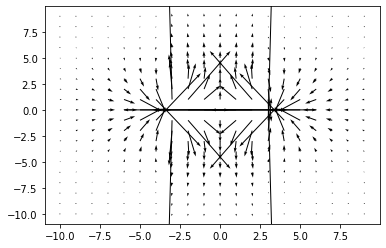

In [19]:
import matplotlib.pyplot as plt

Ex,Ey = EField(charges,X,Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, Ex, Ey)

plt.show()